# Apresentação de dados sobre o Município de Mariana - MG

A análise a seguir é feita a partir de dados públicos sobre as cidades de Minas Gerais, o intuito inicialmente era ter feito um estudo sobre desastres naturais, com foco na queda da barragem de Mariana, mas devido a falta de dados encontrados, foi realizado um estudo para mostrar visualmente, alguns dados financeiros sobre a cidade, durante a epoca que ocorreu o infeliz desastre

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

In [186]:
#variaveis de path dos arquivos

# despesas
despesa_path = 'despesa/Despesa_'

# despesas por funcao
despesafun_path = 'despesa_funcao/Despesa_funcao_'

#imposto repassado
repassado_path = 'repasse/repasse_imposto_'

#anos utilizados na analise
time = [2012, 2013, 2014, 2015]

In [191]:
#dados de impostos recebidos

value = []

for y in range(len(time)):
    df = pd.read_csv(repassado_path + str(time[y]) + '.csv')
    for x in range(len(df.index)):
        if df.index[x][0].split(';')[0] == 'MARIANA':
            value.append(int(str(df.index[x][3].split(";")[1]).replace('"',"").replace(".","")))

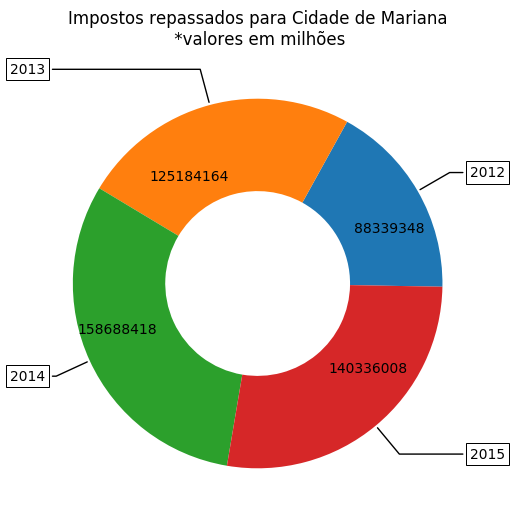

In [192]:
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw=dict(aspect="equal"))


wedges, texts = ax.pie(value, wedgeprops=dict(width=0.5),labels=value,labeldistance=0.6 ,startangle=-1)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(time[i], xy=(x, y), xytext=(1.15*np.sign(x), 1.20*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Impostos repassados para Cidade de Mariana\n *valores em milhões")

plt.show()

In [193]:
# despesa
value = []

for y in range(len(time)):
    df = pd.read_csv(despesa_path + str(time[y]) + '.csv')
    for x in range(len(df.index)):
        if df.index[x][0].split(';')[0] == 'GESTAO AMBIENTAL':
            value.append(int(str(df.index[x][2].split(";")[1]).replace('"',"").replace(".","")))

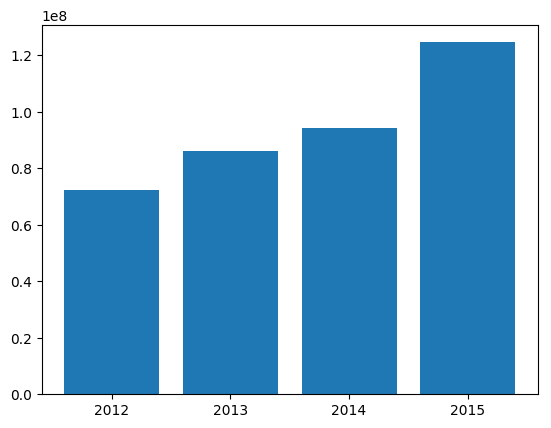

In [194]:
y_pos = np.arange(len(time))
 
# altura
plt.bar(y_pos, value)
 
# nome das barras
plt.xticks(y_pos, time)

# Show graphic
plt.show()


In [195]:
# despesa por funcao

total = []
funcao = []

for y in range(len(time)):
    cargos = []
    valor = []
    valor2 = []
    df = pd.read_csv(despesafun_path + str(time[y]) + '.csv')
    for x in range(len(df.index)):
        cargos.append(df.index[x][0].split(';')[1])
        valor.append(int(str(df.index[x][2].split(';')[1].replace('"',"").replace(".",""))))
    total.append(valor)
    funcao.append(cargos)

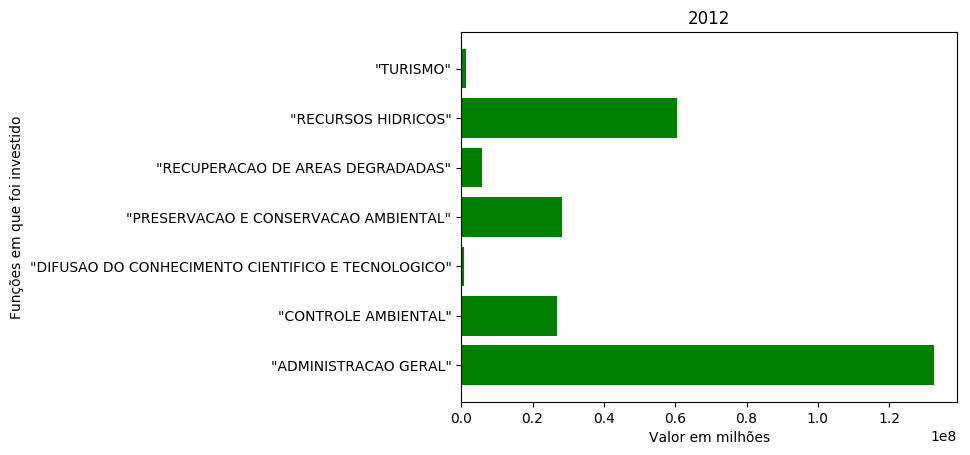

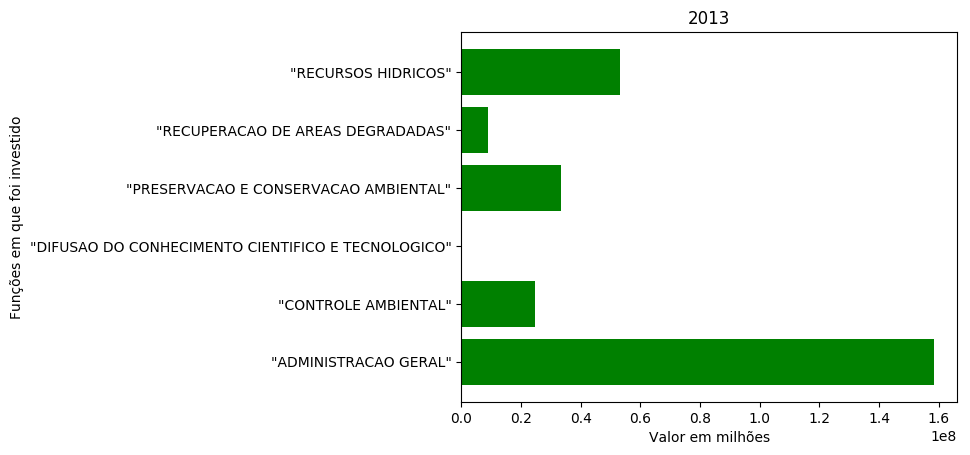

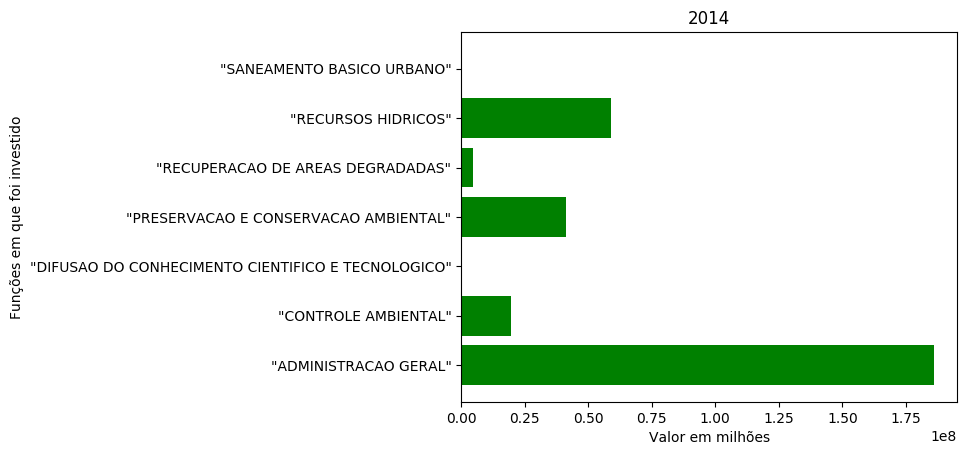

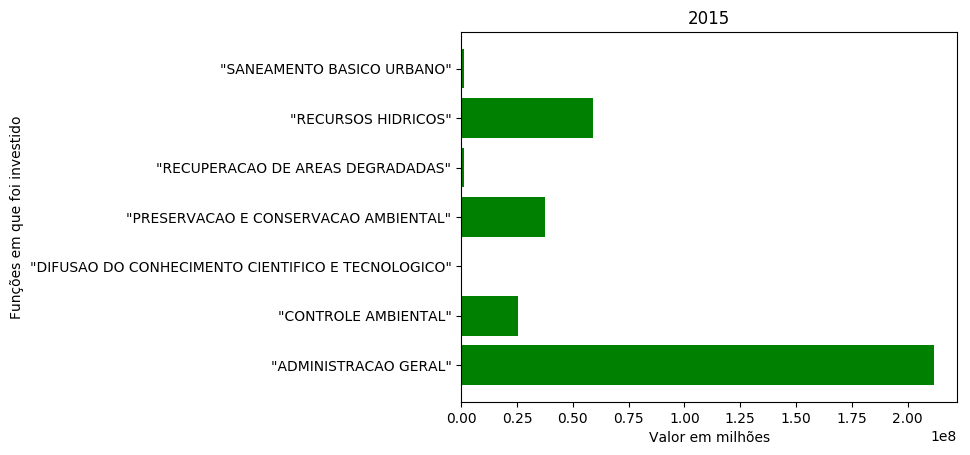

In [196]:
for x in range(len(time)):
    y_pos = np.arange(len(funcao[x]))

    # Create horizontal bars
    plt.barh(y_pos, total[x],color='green')

    # Create names on the y-axis
    plt.yticks(y_pos, funcao[x])

    plt.title(str(time[x]))    
    plt.ylabel("Funções em que foi investido")
    plt.xlabel("Valor em milhões")

    # Show graphic
    plt.show()

